firstly we will import all the libararies required

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
df=pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [47]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [49]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


so we get it that the sleep disorder has null value . which is very large

before dropping this column we will analyze



<Axes: xlabel='Sleep Disorder', ylabel='count'>

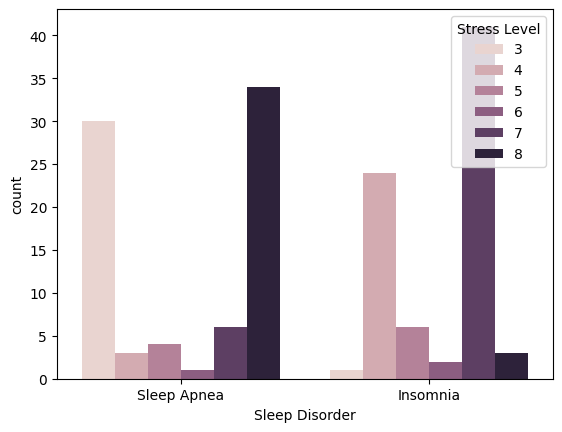

In [50]:
subset=df.dropna(subset=['Sleep Disorder'])
sns.countplot(data=subset,x='Sleep Disorder', hue='Stress Level')

but the data is 58% missing values which is not good . i will drop it .

In [51]:
df = df.drop(columns=['Sleep Disorder'])


In [52]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [53]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


stress has different levels , like 3,4,5,6,7,8

Stress Level
3    71
8    70
4    70
5    67
7    50
6    46
Name: count, dtype: int64


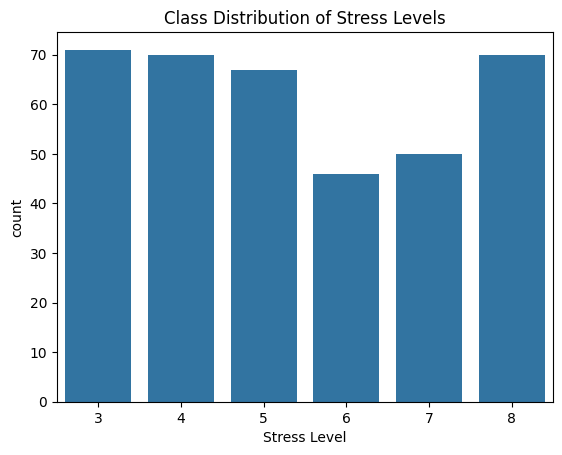

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count values of each class
print(df['Stress Level'].value_counts())

# Plot it
sns.countplot(x='Stress Level', data=df)
plt.title("Class Distribution of Stress Levels")
plt.show()


In [55]:
df.groupby('Stress Level')[['Sleep Duration', 'Physical Activity Level', 'Daily Steps', 'Heart Rate','Quality of Sleep','Age']].mean()



,Sleep Duration,Physical Activity Level,Daily Steps,Heart Rate,Quality of Sleep,Age
Stress Level,,,,,,
3,8.226761,54.718310,6132.394366,67.098592,8.971831,54.169014
4,7.030000,55.785714,6422.857143,66.828571,7.671429,39.900000
5,7.483582,74.253731,7616.417910,70.074627,7.895522,40.313433
6,7.454348,67.152174,7363.043478,70.717391,7.000000,33.065217
7,6.468000,43.840000,5662.000000,73.300000,6.000000,42.680000
8,6.050000,58.342857,7605.714286,74.100000,5.857143,39.742857


In [56]:
df['Occupation'].value_counts()


,count
Occupation,
Nurse,73
Doctor,71
Engineer,63
Lawyer,47
Teacher,40
Accountant,37
Salesperson,32
Scientist,4
Software Engineer,4


In [57]:
df=df.drop(columns=['Occupation'])


In [58]:
df['BMI Category'].value_counts()


,count
BMI Category,
Normal,195
Overweight,148
Normal Weight,21
Obese,10


In [59]:
df.groupby('BMI Category')['Stress Level'].mean()


,Stress Level
BMI Category,
Normal,5.128205
Normal Weight,5.190476
Obese,5.700000
Overweight,5.729730


In [60]:
# Merge Normal Weight → Normal
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

# Create simplified version
def simplify_bmi(x):
    if x in ['Overweight', 'Obese']:
        return 'High'
    else:
        return 'Normal'

df['BMI Simple'] = df['BMI Category'].apply(simplify_bmi)


In [61]:
df['Gender'].value_counts()


,count
Gender,
Male,189
Female,185


<Axes: xlabel='Gender', ylabel='count'>

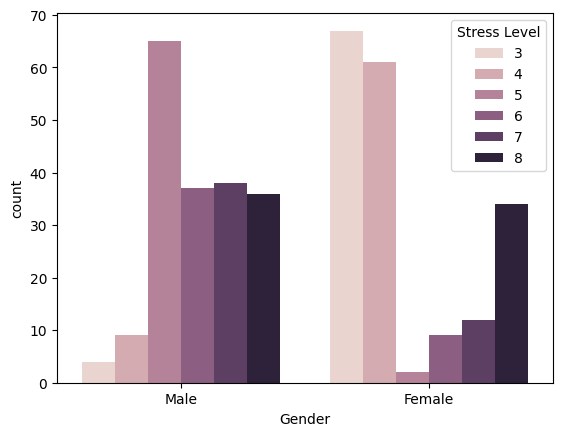

In [62]:
import seaborn as sns
sns.countplot(x='Gender', hue='Stress Level', data=df)


In [63]:
def stress_category(x):
    if x <= 4:
        return 'Low'
    elif x <= 6:
        return 'Moderate'
    else:
        return 'High'

df['Stress Level Cat'] = df['Stress Level'].apply(stress_category)


In [64]:
df = df.drop(columns=['Stress Level'])


In [65]:
df = df.drop(columns=['Age'])

In [66]:
df = df.drop(columns=['Daily Steps'])

In [67]:
df = df.drop(columns=['Physical Activity Level'])

In [68]:
df = df.drop(columns=['Blood_Pressure'], errors='ignore')



In [69]:
Q1 = df['Sleep Duration'].quantile(0.25)
Q3 = df['Sleep Duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Sleep Duration'] < lower_bound) | (df['Sleep Duration'] > upper_bound)]
print(f"Outliers in Sleep_Duration: {len(outliers)} rows")


Outliers in Sleep_Duration: 0 rows


In [70]:
Q1 = df['Heart Rate'].quantile(0.25)
Q3 = df['Heart Rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Heart Rate'] < lower_bound) | (df['Heart Rate'] > upper_bound)]
print(f"Outliers in Heart Rate: {len(outliers)} rows")



Outliers in Heart Rate: 15 rows


In [71]:
print("Heart Rate Range:", df['Heart Rate'].min(), "to", df['Heart Rate'].max())


Heart Rate Range: 65 to 86


In [72]:
Q1 = df['Quality of Sleep'].quantile(0.25)
Q3 = df['Quality of Sleep'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Quality of Sleep'] < lower_bound) | (df['Quality of Sleep'] > upper_bound)]
print(f"Outliers in Quality Sleep: {len(outliers)} rows")

Outliers in Quality Sleep: 0 rows


In [73]:
# Encode Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Encode BMI_Simple
df['BMI Simple'] = df['BMI Simple'].map({'Normal': 0, 'High': 1})

# Encode target (if not done)
df['Stress Level Cat'] = df['Stress Level Cat'].map({'Low': 0, 'Moderate': 1, 'High': 2})


In [74]:
df.dtypes


,0
Person ID,int64
Gender,int64
Sleep Duration,float64
Quality of Sleep,int64
BMI Category,object
Blood Pressure,object
Heart Rate,int64
BMI Simple,int64
Stress Level Cat,int64


In [75]:
# Drop unnecessary or object-type columns
df = df.drop(columns=[
    'Person ID', 'BMI Category', 'Blood Pressure', 'Sleep Disorder'
], errors='ignore')

# Double check that only numeric columns are left
print(df.dtypes)


Gender                int64
Sleep Duration      float64
Quality of Sleep      int64
Heart Rate            int64
BMI Simple            int64
Stress Level Cat      int64
dtype: object


In [76]:
df_raw = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")



In [77]:
df_raw.columns
df_raw.head()



,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [78]:
df['Stress Level'] = df_raw['Stress Level']



In [79]:
def stress_category(x):
    if x <= 4:
        return 'Low'
    elif x <= 6:
        return 'Moderate'
    else:
        return 'High'

df['Stress Level Cat'] = df['Stress Level'].apply(stress_category)

df['Stress Level Cat'] = df['Stress Level Cat'].replace({
    'Low': 0,
    'Moderate': 1,
    'High': 2
})


/tmp/ipython-input-79-3861232308.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stress Level Cat'] = df['Stress Level Cat'].replace({


In [80]:
df['Stress Level Cat'].value_counts()



,count
Stress Level Cat,
0,141
2,120
1,113


In [81]:
print(df['Stress Level Cat'].isnull().sum())

0


In [82]:
df.dtypes

,0
Gender,int64
Sleep Duration,float64
Quality of Sleep,int64
Heart Rate,int64
BMI Simple,int64
Stress Level Cat,int64
Stress Level,int64


In [83]:
X = df.drop(columns=['Stress Level', 'Stress Level Cat'])  # Drop both target and original label
y = df['Stress Level Cat']



In [84]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.86      0.92        28
           1       0.85      0.96      0.90        23
           2       0.96      1.00      0.98        24

    accuracy                           0.93        75
   macro avg       0.94      0.94      0.93        75
weighted avg       0.94      0.93      0.93        75

[[24  4  0]
 [ 0 22  1]
 [ 0  0 24]]


In [85]:
def predict_stress_level(gender, sleep_duration, quality_of_sleep, heart_rate, bmi_simple):
    # Convert inputs
    gender_val = 0 if gender.lower() == "male" else 1
    bmi_val = 0 if bmi_simple.lower() == "normal" else 1

    # Input array
    input_array = np.array([[gender_val, sleep_duration, quality_of_sleep, heart_rate, bmi_val]])

    # Predict
    prediction = model.predict(input_array)[0]
    levels = {0: "Low", 1: "Moderate", 2: "High"}

    return f"Predicted Stress Level: {levels[prediction]}"


In [86]:
predict_stress_level("Female", 6.5, 7, 80, "High")



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'Predicted Stress Level: High'

saving model

In [87]:
import joblib
joblib.dump(model, "stress_predictor_model.pkl")


['stress_predictor_model.pkl']